## Adding the directory of the package to the system path

In [1]:
from config import *
append_path('../../')

## Import statements

In [2]:
import numpy as np
import pandas as pd
from m_learn.decomposition import pca
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from sklearn import decomposition
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Decompose 3D lines into 2D lines

## Create 4 3D lines

**Create x,y,z values of 4 3D lines**

In [3]:
# sigma of the random distribution
sigma = 2
# size of each class
cls_size = 50
# x values
x1 = np.linspace(0,10, cls_size)
x2 = x1.copy()
x3 = x1.copy()
x4 = x1.copy()
# y values
y1 = 0.05*x1
y2 = 5*x1
y3 = 10*x1
y4 = 15*x1
# z values
z1 = np.linspace(0,10, cls_size)
z2 = z1.copy()
z3 = z1.copy()
z4 = z1.copy()

**Concatenate the x,y,z values of the 4 3D lines**

In [4]:
x = np.concatenate((x1,x2,x3,x4))
y = np.concatenate((y1,y2,y3,y4))
z = np.concatenate((z1,z2,z3,z4))

**Storing the data in pandas dataframe**

In [5]:
data = pd.DataFrame({"x": x, "y": y, "z":z})
data.head(10)

,x,y,z
0,0.000000,0.000000,0.000000
1,0.204082,0.010204,0.204082
2,0.408163,0.020408,0.408163
3,0.612245,0.030612,0.612245
4,0.816327,0.040816,0.816327
5,1.020408,0.051020,1.020408
6,1.224490,0.061224,1.224490
7,1.428571,0.071429,1.428571
8,1.632653,0.081633,1.632653
9,1.836735,0.091837,1.836735


## 3 dimensional plots of the 4 3D lines

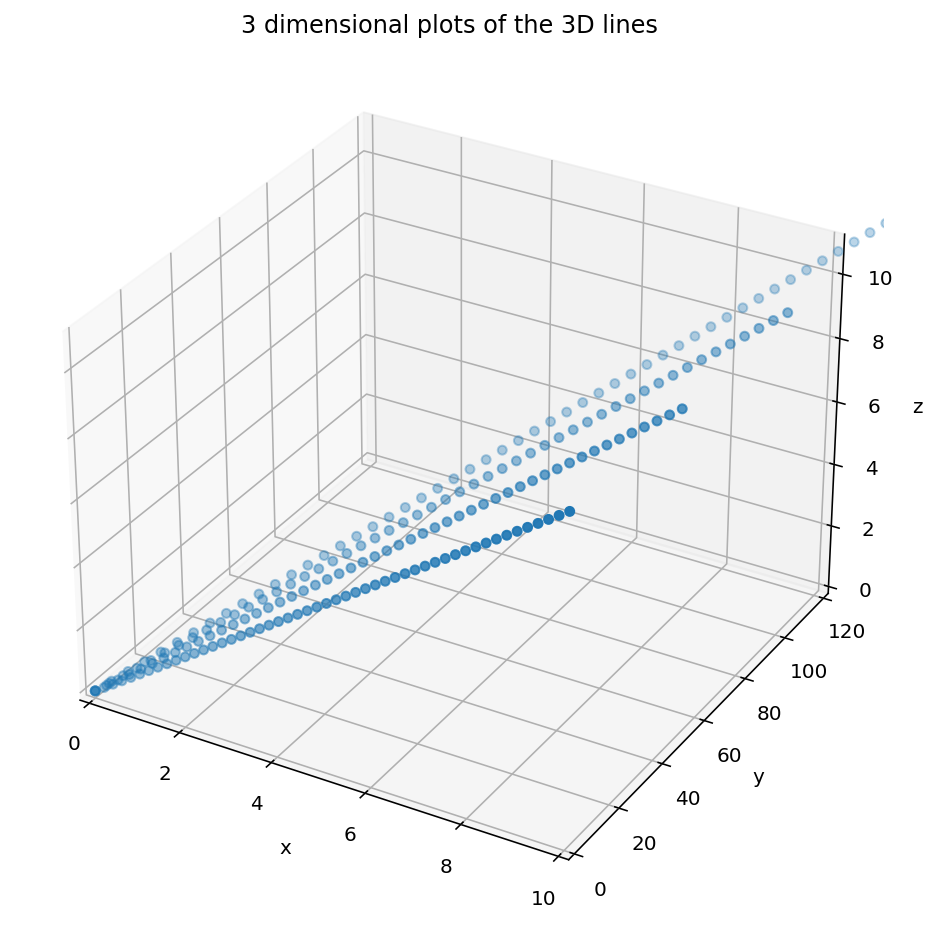

In [6]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["x"], data["y"], data["z"])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(0,10)
ax.set_ylim(0,120)
ax.set_zlim(0,11)
ax.set_title("3 dimensional plots of the 3D lines")
plt.show()

**Decompose the 3D data using PCA**

In [7]:
# features of the pca model
features = ['x', 'y', 'z']
# create object of pca model with 2 components
model = pca(n_components=2)
# fitting the model
Z = model.fit_transform(data, features)

In [8]:
Z.shape

(200, 2)

**Scatter plot of the decomposed data**

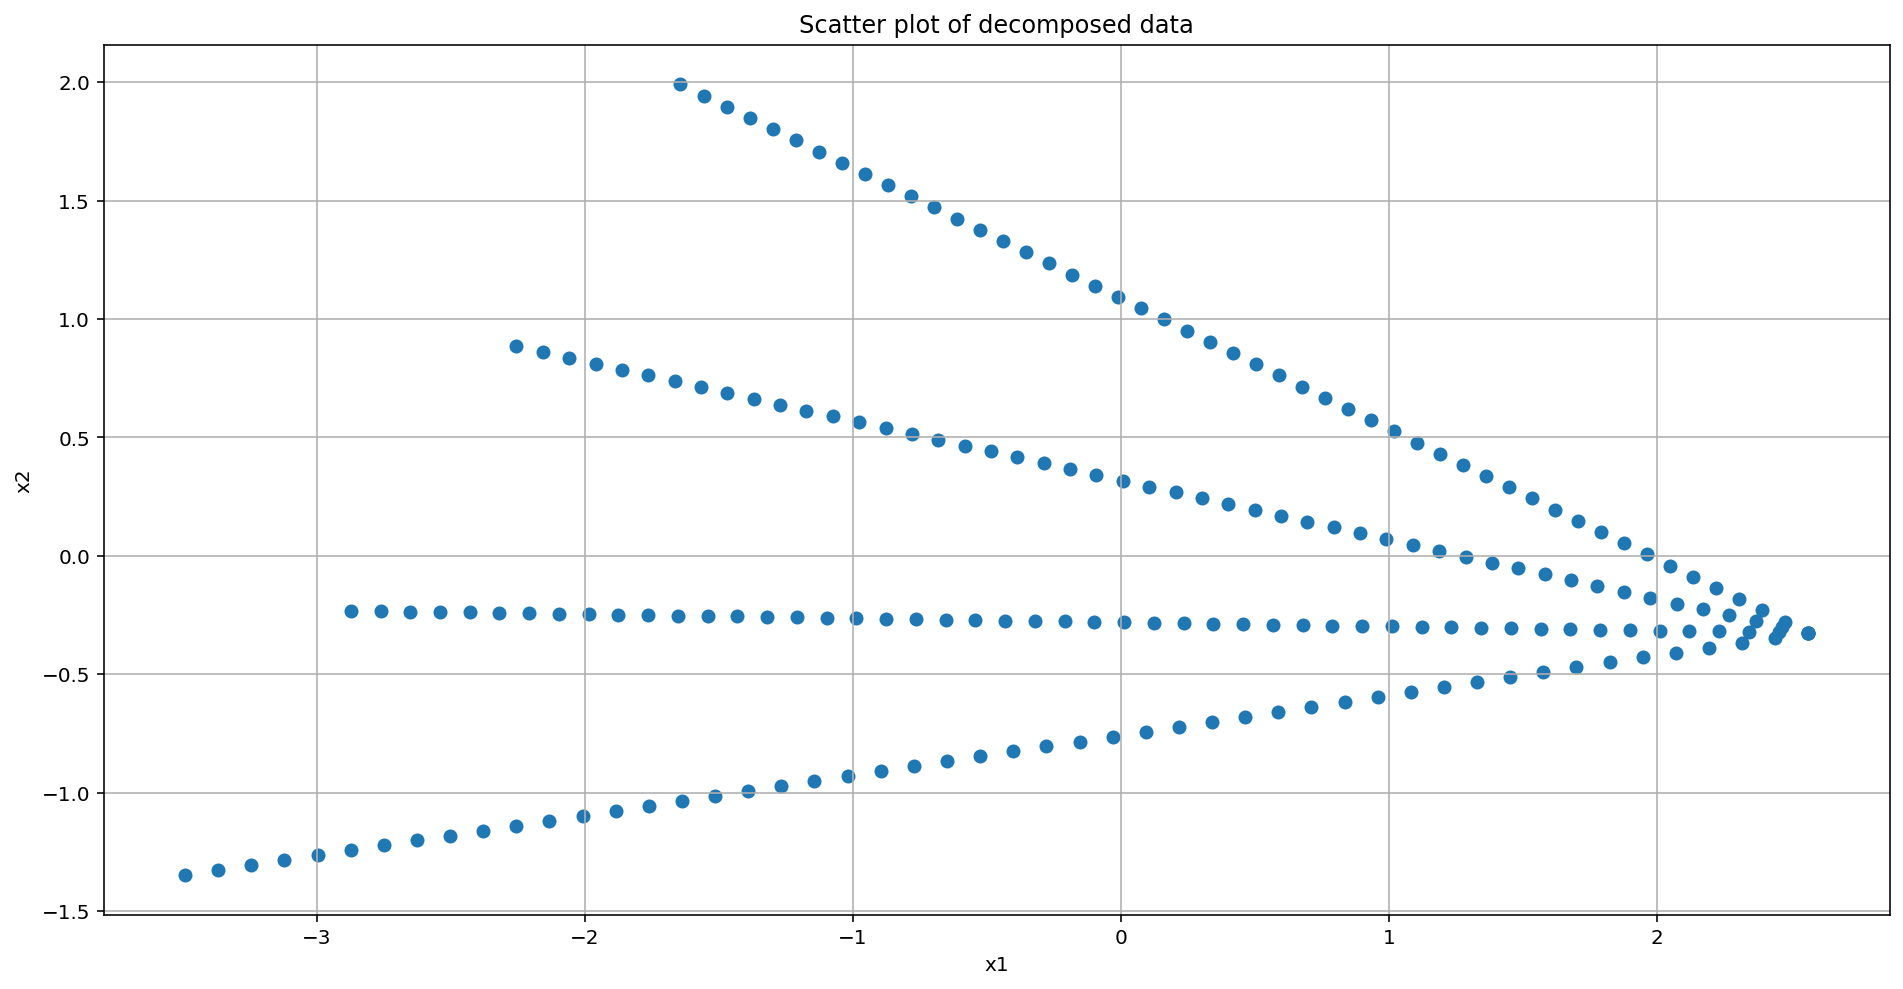

In [9]:
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of decomposed data")
plt.grid()

# Decompose Iris Data

## Loading the iris data

In [10]:
from sklearn.datasets import load_iris

**Loading the feature matrix**

In [11]:
iris_data = load_iris()['data']

**Storing the data in pandas dataframe**

In [12]:
features = load_iris()['feature_names']
output = 'species'
data = pd.DataFrame(iris_data, columns=features)

In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Domposition into 3D data

**Decompose the 4D data using PCA**

In [14]:
model = pca(n_components=3)
Z = model.fit_transform(data, features)

**Store the reduced data in pandas dataframe**

In [15]:
# store the reduced feature matrix
reduced_data = pd.DataFrame(Z, columns=["x1", "x2", "x3"])
# store the output
reduced_data[output] = load_iris()['target']

**Extract the class of setosa, versicolor, virginica**

In [16]:
setosa = reduced_data[reduced_data[output] == 0]
versicolor = reduced_data[reduced_data[output] == 1]
virginica = reduced_data[reduced_data[output] == 2]

**Scatter plot of the Decomposed Data**

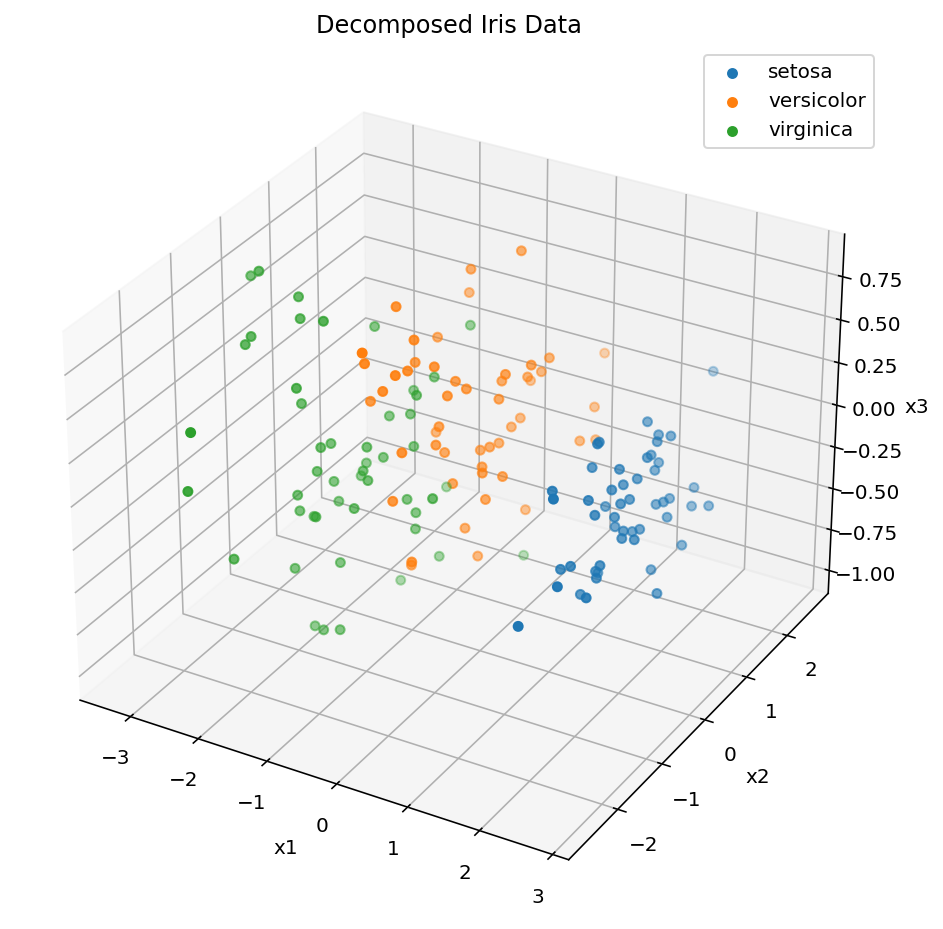

In [17]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(setosa['x1'], setosa['x2'], setosa['x3'], label = 'setosa')
ax.scatter(versicolor['x1'], versicolor['x2'], versicolor['x3'], label = 'versicolor')
ax.scatter(virginica['x1'], virginica['x2'], virginica['x3'], label = 'virginica')
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("Decomposed Iris Data")
plt.show()

## Domposition into 2D data

In [18]:
# Decompose the 4D data using PCA
model = pca(n_components=2)
Z = model.fit_transform(data, features)
# Store the reduced data in pandas dataframe
reduced_data = pd.DataFrame(Z, columns=['x1', 'x2'])
reduced_data[output] = load_iris()['target']
# Extract the class of setosa, versicolor, virginica
setosa = reduced_data[reduced_data[output] == 0]
versicolor = reduced_data[reduced_data[output] == 1]
virginica = reduced_data[reduced_data[output] == 2]

**Scatter plot of the Decomposed Data**

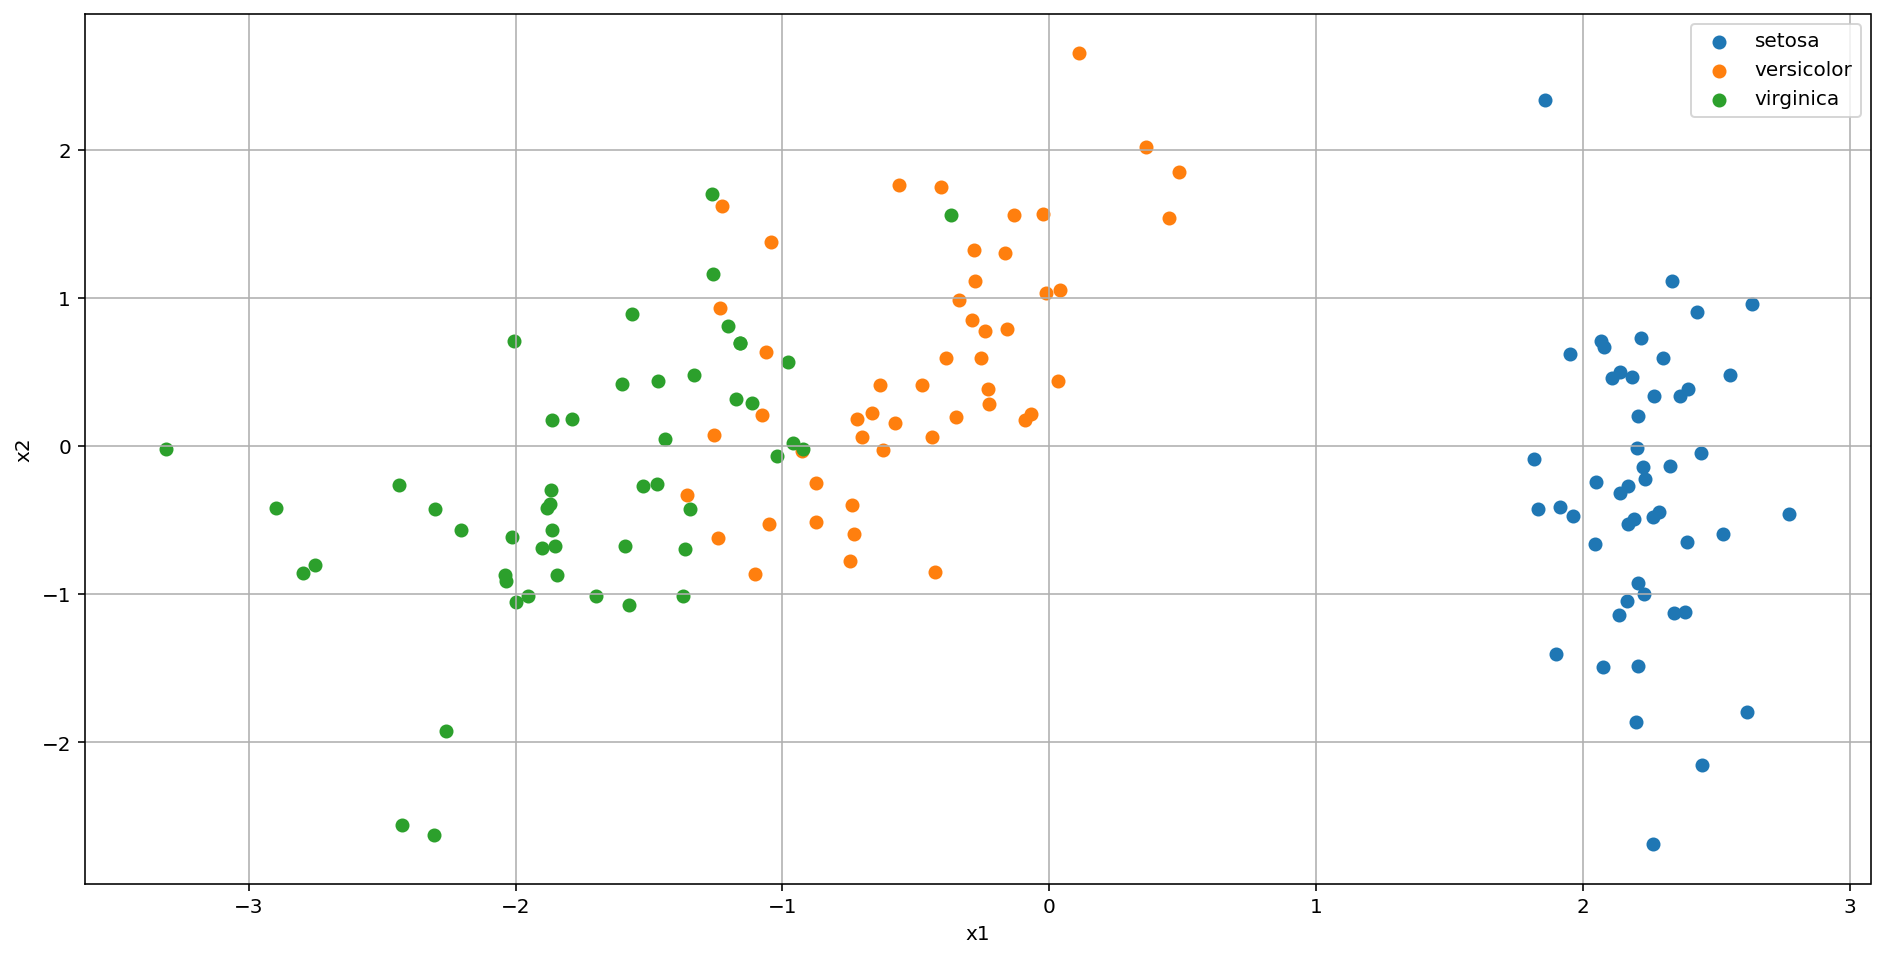

In [19]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
plt.scatter(setosa['x1'], setosa['x2'], label = 'setosa')
plt.scatter(versicolor['x1'], versicolor['x2'], label = 'versicolor')
plt.scatter(virginica['x1'], virginica['x2'], label = 'virginica')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.grid()
plt.show()